<a href="https://colab.research.google.com/github/Luganda1/Google-colab-/blob/main/LEGO_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Display an image in a Text cell, use an HTML <img> tag with the URL of the image. For example:<img src="https://i.imgur.com/49FNOHj.jpg">

If you are using Jupyter Notebook <img src="assets/bricks.jpg">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
colors = pd.read_csv('data/colors.csv')
sets = pd.read_csv('data/sets.csv')
themes = pd.read_csv('data/themes.csv')


In [ ]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

Find the number of transparent colours

In [2]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


#**Understanding LEGO Themes Vs LEGO Sets**

Walking into a LEGO store and you will see their products organanised by theme. Their  themes typically have many different sets 
<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_09-59-18-bb72700801f816440f58289b5658841c.png">

##**EXPLORING SETS **



In [3]:
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
sets.nunique()

set_num      15710
name         13437
year            71
theme_id       571
num_parts     1247
dtype: int64

In [4]:
sets.sort_values('num_parts', ascending=False)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
...,...,...,...,...,...
1782,20216-1,MBA Robot & Micro Designer (Kits 2 - 3 Redesign),2013,432,0
1780,20214-1,MBA Adventure Designer (Kits 7 - 9 Redesign),2013,432,0
6822,5005539-1,Brick Pouch (Yellow),2018,501,0
9026,66319-1,Power Miners 3 in 1 Superpack,2009,439,0


In [4]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


how many items did lego sell in the first year 

In [ ]:
sets[sets.year == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [6]:
sets_by_year = sets.groupby('year').count()
sets_by_year = sets_by_year[0:-2:]
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [9]:
sets_by_year['set_num'].tail()

year
2015    774
2016    757
2017    786
2018    816
2019    840
Name: set_num, dtype: int64

In [7]:
print(sets_by_year)

      set_num  name  theme_id  num_parts
year                                    
1949        5     5         5          5
1950        6     6         6          6
1953        4     4         4          4
1954       14    14        14         14
1955       28    28        28         28
...       ...   ...       ...        ...
2015      774   774       774        774
2016      757   757       757        757
2017      786   786       786        786
2018      816   816       816        816
2019      840   840       840        840

[69 rows x 4 columns]


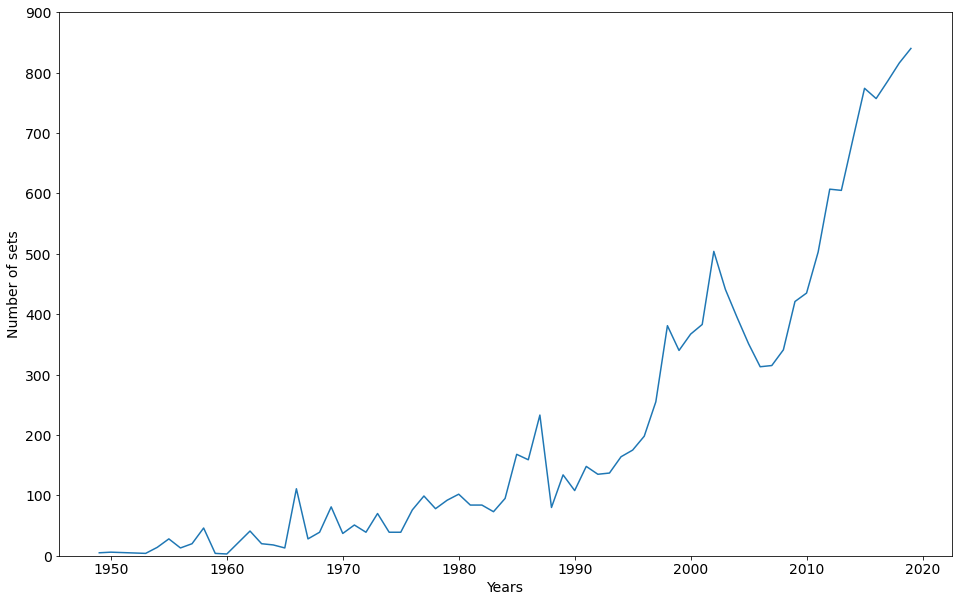

In [11]:

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of sets', fontsize=14)
plt.ylim(0, 900)
plt.plot(sets_by_year.index, sets_by_year['set_num'])

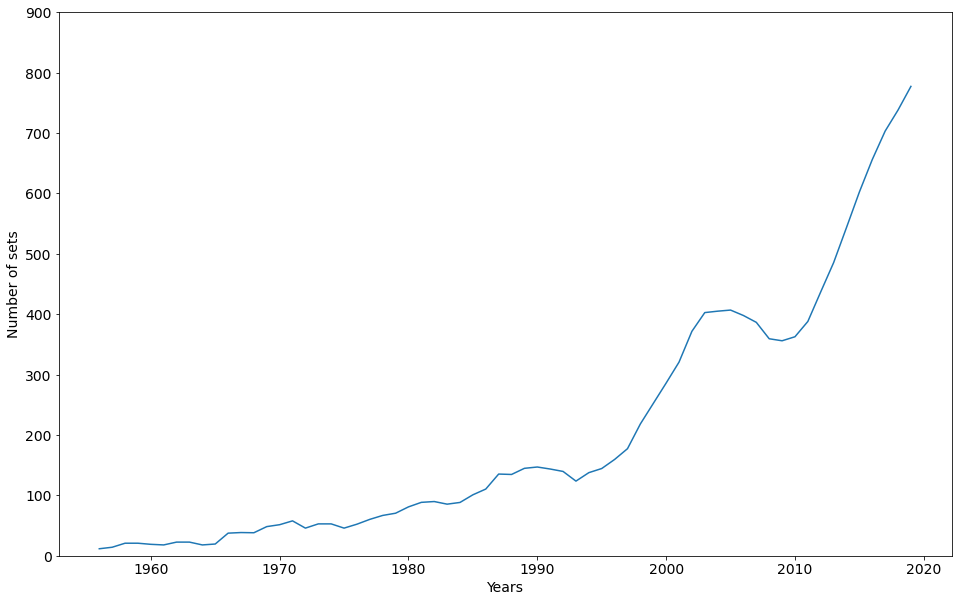

In [8]:
sets_by_year_avg = sets_by_year.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of sets', fontsize=14)
plt.ylim(0, 900)
plt.plot(sets_by_year_avg.index, sets_by_year_avg['set_num'])

We can accomplish this by chaining the .groupby() and the .agg() functions together:

Note, the .agg() method takes a dictionary as an argument. In this dictionary, we specify which operation we'd like to apply to each column. In our case, we just want to calculate the number of unique entries in the theme_id column by using our old friend, the .nunique() method.

Let's give our column in themes_by_year a more appropriate name and let's take a look at what we've got:


Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet. ... Indexing and Selecting Data in Series.Jan 17, 2019

Python | Pandas Series - GeeksforGeeks
https://www.geeksforgeeks.org › python-pandas-series


In [11]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace=True)
print(themes_by_year)

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4
...         ...
2017         89
2018         93
2019         78
2020         82
2021          1

[71 rows x 1 columns]


In [12]:
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


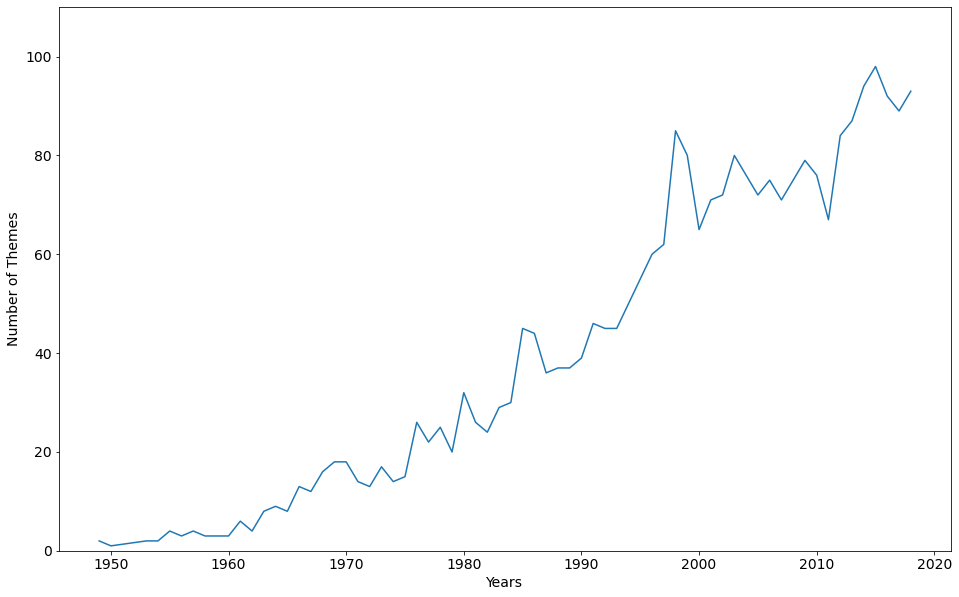

In [13]:
themes_by_year_avg = themes_by_year.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of Themes', fontsize=14)
plt.ylim(0, 110)
plt.plot(themes_by_year[:-3].index, themes_by_year[:-3].nr_themes)

Two Separate Axes

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

    ax1 = plt.gca() # get current axes
    ax2 = ax1.twinx() 

We then create another axis object: ax2. The key thing is that by using the .twinx() method allows ax1 and ax2 to share the same x-axis. When we plot our data on the axes objects we get this:

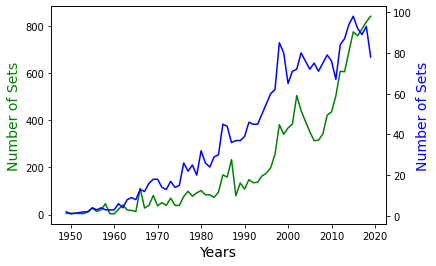

In [14]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlabel('Years', fontsize=14)
ax1.set_ylabel('Number of Sets', fontsize=14, color='green')
ax2.set_ylabel('Number of Sets', fontsize=14, color='blue')
ax1.plot(sets_by_year.index, sets_by_year['set_num'], color='g')
ax2.plot(themes_by_year[:-2].index, themes_by_year[:-2].nr_themes, 'b')


In [16]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [17]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


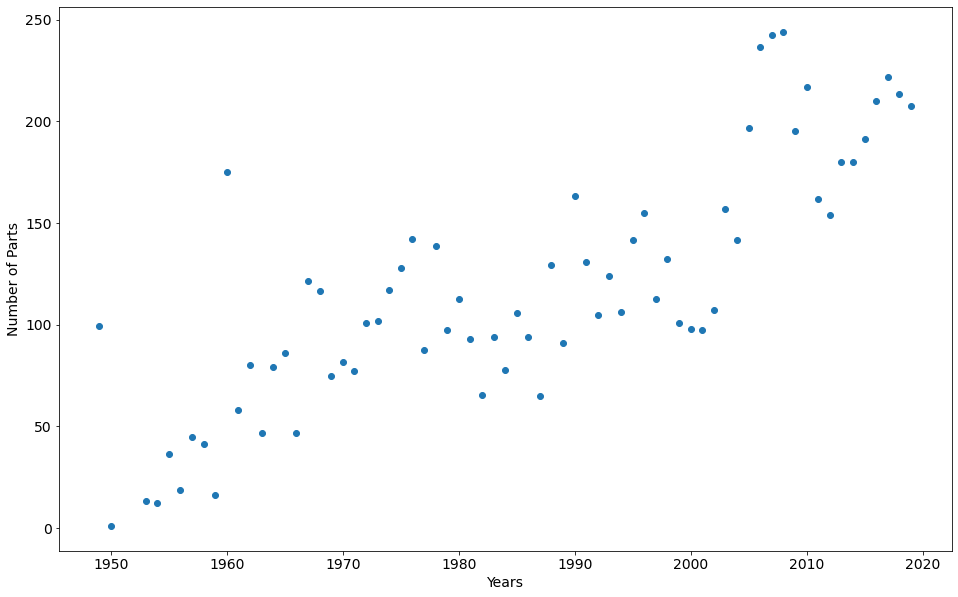

In [18]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of Parts', fontsize=14)
plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2])

which theme has the largest number of individual sets? 
To count the number of sets per Theme we can use the .value_counts() method on our theme_id column. But there's one problem:

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-18-04-9bbb260d201de1b104afa814b9e6b1ca.png">







[link text](https://i.imgur.com/Sg4lcjx.png)

<img src="https://i.imgur.com/Sg4lcjx.png">
```
# This is formatted as code
```



**Working with a Relational Database**

What is a database schema? A schema is just how the database is organised. Many relational databases, such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.

In [19]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [20]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [21]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [18]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


Let's use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames. 

In [25]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]
print(set_theme_count)

158    753
501    656
494    398
435    356
503    329
      ... 
373      1
515      1
531      1
370      1
380      1
Name: theme_id, Length: 571, dtype: int64


Here I'm providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.

In [26]:
set_theme_count = pd.DataFrame({
    'id': set_theme_count.index,
    'set_count': set_theme_count.values
})
print(set_theme_count)

      id  set_count
0    158        753
1    501        656
2    494        398
3    435        356
4    503        329
..   ...        ...
566  373          1
567  515          1
568  531          1
569  370          1
570  380          1

[571 rows x 2 columns]


In [27]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

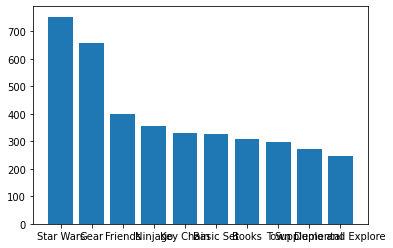

In [28]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

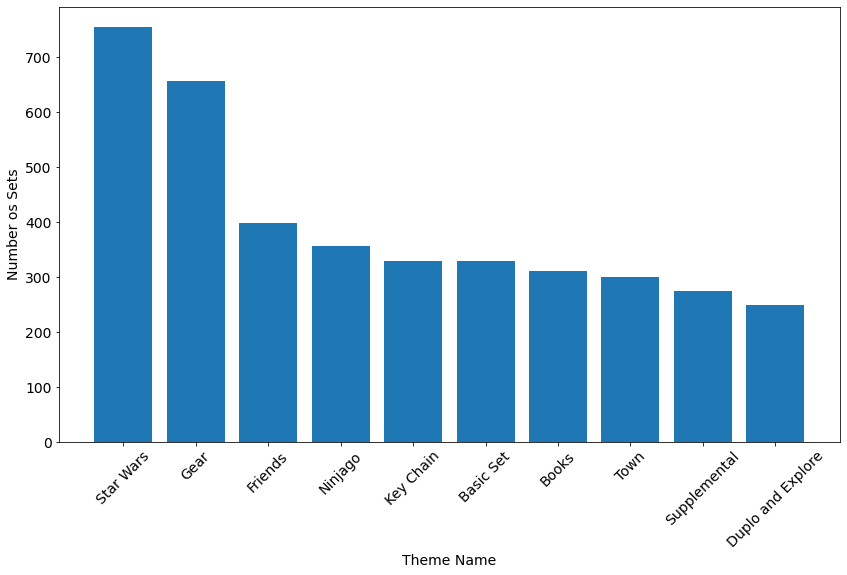

In [30]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number os Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

    use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.

    combine the groupby() and count() functions to aggregate data

    use the .value_counts() function

    slice DataFrames using the square bracket notation e.g., df[:-2] or df[:10]

    use the .agg() function to run an operation on a particular column

    rename() columns of DataFrames

    create a line chart with two separate axes to visualise data that have different scales.

    create a scatter plot in Matplotlib

    work with tables in a relational database by using primary and foreign keys

    .merge() DataFrames along a particular column

    create a bar chart with Matplotlib